In [1]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import os
import pandas as pd
import numpy as np
import rpy2.robjects as ro
import sys

import scanpy as sc
import matplotlib.pyplot as plt

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

c:\Users\kyria.000\anaconda3\envs\Py310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [12]:
%%R
options(future.globals.maxSize = 1000000 * 1024^2)
set.seed(2422012)

# Single cell libraries
library(Seurat)
library(sctransform)
library(rliger)
library(SeuratWrappers)
library(conos)
library(scater)
library(scDblFinder)
library(scran)
library(sctransform)
library(scry)

# Rest libraries
library(BiocParallel)
library(ggplot2)
library(dplyr)
library(cowplot)

library(Nebulosa)

library(scCustomize)



In [13]:
%%R
sessionInfo()

R version 4.2.2 (2022-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22621)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Nebulosa_1.8.0              scCustomize_1.1.1          
 [3] dplyr_1.1.0                 BiocParallel_1.32.5        
 [5] scry_1.10.0                 scran_1.26.2               
 [7] scDblFinder_1.12.0          scater_1.26.1              
 [9] ggplot2_3.4.1               scuttle_1.8.4              
[11] SingleCellExperiment_1.20.1 SummarizedExperiment_1.28.0
[13] Biobase_2.58.0              GenomicRanges_1.50.2       
[15] GenomeInfoDb_1.34.7         IRanges_2.32.0       

In [3]:
projectdir = "C:/Users/kyria.000/Documents/PhD/Projects/Feng2023/"
datadir = projectdir + "Data/"
resultdir = projectdir + "Result/Density_Plots/"
adata_file = 'AnnData_Integrated.h5ad'


In [4]:
%%R -i resultdir
dir.create(resultdir)

In [5]:
%%R
Subbbb <- readRDS("Subset_raarranged.rds")
Idents(Subbbb) <- "CellType"
DefaultAssay(Subbbb) <- "RNA"


# ================= CCR7 Possitive ================================
Idents(Subbbb) <- "CellType"
CCR7pCD45ROp_T_cells.use <- WhichCells(Subbbb,idents = "CCR7pCD45ROp", expression = CCR7>= 1 )
CCR7pCD45ROp_T <- subset(Subbbb, cells = CCR7pCD45ROp_T_cells.use)
Idents(CCR7pCD45ROp_T) <- "Condition"
CCR7pCD45ROp_T_HC <- subset(CCR7pCD45ROp_T, idents = "HC")
CCR7pCD45ROp_T_PD <- subset(CCR7pCD45ROp_T, idents = "PD")

CCR7pCD45ROm_T_cells.use <- WhichCells(Subbbb,idents = "CCR7pCD45ROm", expression = CCR7>= 1 )
CCR7pCD45ROm_T <- subset(Subbbb, cells = CCR7pCD45ROm_T_cells.use)
Idents(CCR7pCD45ROm_T) <- "Condition"
CCR7pCD45ROm_T_HC <- subset(CCR7pCD45ROm_T, idents = "HC")
CCR7pCD45ROm_T_PD <- subset(CCR7pCD45ROm_T, idents = "PD")

# ================= CCR7 Negative ================================
CCR7mCD45ROp_T_cells.use <- WhichCells(Subbbb,idents = "CCR7mCD45ROp", expression = CCR7<= 0 )
CCR7mCD45ROp_T<- subset(Subbbb, cells = CCR7mCD45ROp_T_cells.use)
Idents(CCR7mCD45ROp_T) <- "Condition"
CCR7mCD45ROp_T_HC <- subset(CCR7mCD45ROp_T, idents = "HC")
CCR7mCD45ROp_T_PD <- subset(CCR7mCD45ROp_T, idents = "PD")

CCR7mCD45ROm_T_cells.use <- WhichCells(Subbbb,idents = "CCR7mCD45ROm", expression = CCR7<= 0 )
CCR7mCD45ROm_T<- subset(Subbbb, cells = CCR7mCD45ROm_T_cells.use)
Idents(CCR7mCD45ROm_T) <- "Condition"
CCR7mCD45ROm_T_HC <- subset(CCR7mCD45ROm_T, idents = "HC")
CCR7mCD45ROm_T_PD <- subset(CCR7mCD45ROm_T, idents = "PD")

# GZMA+GZMB+

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


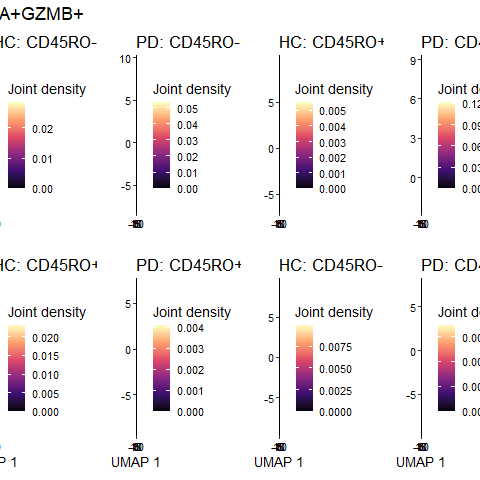

In [9]:
%%R -i resultdir
features <- c("GZMA","GZMB")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = "counts",
  assay = "RNA"
) 
data_df_res
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))
write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))



p <- ggplot(df_percent_melt%>%filter(Gene==paste0("Joint_",title_genes)),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(paste0("Joint_",title_genes))+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".png"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

# GZMA+GZMB+PRF1+FCGR3A+

In [6]:
%%R
count_mat <- as.data.frame(t(Subbbb@assays$RNA@counts[c("GZMA","GZMB","PRF1","FCGR3A"),]))
count_mat[count_mat>=1] <- 1
print(dim(count_mat))
count_mat$SUM <- ifelse(rowSums(count_mat)==4,1,0)
count_mat$CellType <- Subbbb$CCellType

as.data.frame(table(count_mat$SUM,count_mat$CellType))


[1] 24832     4
  Var1         Var2 Freq
1    0 CD45RO-CCR7+ 5262
2    1 CD45RO-CCR7+    2
3    0 CD45RO+CCR7+ 3391
4    1 CD45RO+CCR7+    1
5    0 CD45RO+CCR7- 8454
6    1 CD45RO+CCR7-  497
7    0 CD45RO-CCR7- 6057
8    1 CD45RO-CCR7- 1168


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
                             CCR7pCD45ROm_HC CCR7pCD45ROm_PD CCR7pCD45ROp_HC
GZMA                              2.99483649      2.03476049     17.32186732
GZMB                              0.17211704      0.16956337      0.12285012
PRF1                              3.51118761      2.96735905      6.30630631
FCGR3A                            0.10327022      0.29673591      0.69615070
GZMA+GZMB+PRF1+FCGR3A+            0.03442341      0.04239084      0.04095004
Joint_GZMA+GZMB+PRF1+FCGR3A+      6.36833046      5.04451039     21.29402129
                             CCR7pCD45ROp_PD CCR7mCD45ROp_HC CCR7mCD45ROp_PD
GZMA                              21.4736842       50.531151       64.447696
GZMB                               0.1052632       15.733563       30.248720
PRF1                               8.7368421       32.845248       36.777615
FCGR3A                             0.6315789        8.929084       15.819312
GZMA+GZMB+PRF1+FCGR3

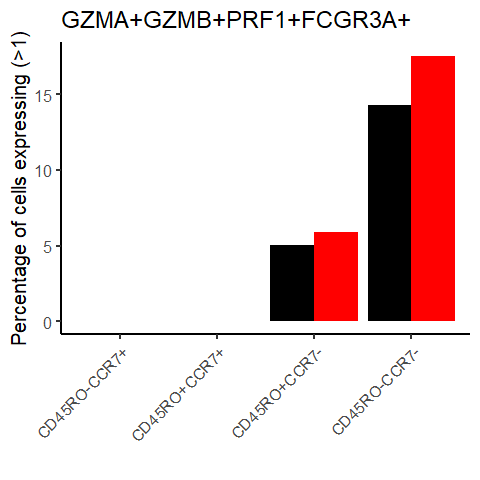

In [9]:
%%R
source("Functions.R")
features <-  c("GZMA","GZMB","PRF1","FCGR3A")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = "counts",
  assay = "RNA"
) 
data_df_res
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))

df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)

df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)



p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))
write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))
print(data_df_res)
p

# GZMA+GZMB+PRF1+FCGR3A+

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


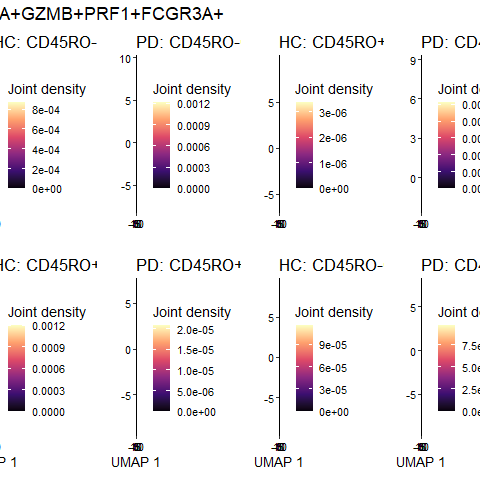

In [10]:
%%R -i resultdir
features <- c("GZMA","GZMB","PRF1","FCGR3A")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = "counts",
  assay = "RNA"
) 
data_df_res
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))
write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

In [11]:
%%R


UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


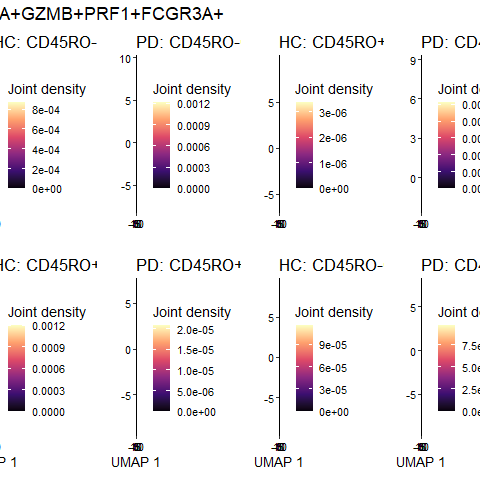

In [12]:
%%R -i resultdir
features <- c("GZMA","GZMB","PRF1","FCGR3A")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = NULL,
  assay = NULL
) 
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))



p <- ggplot(df_percent_melt%>%filter(Gene==paste0("Joint_",title_genes)),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(paste0("Joint_",title_genes))+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".png"))



write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

# GZMA+GZMB+PRF1+

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


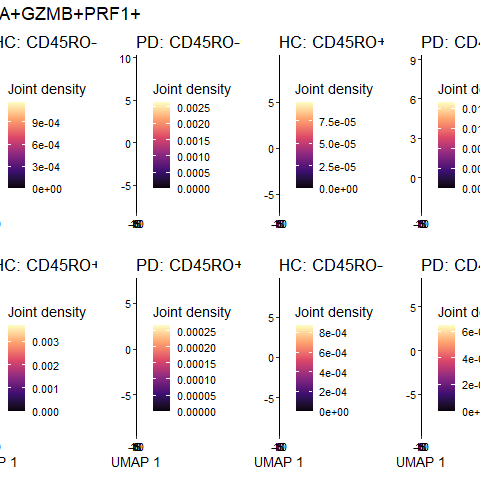

In [13]:
%%R -i resultdir
source("Functions.R")
features <- c("GZMA","GZMB","PRF1")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = NULL,
  assay = NULL
) 
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))



p <- ggplot(df_percent_melt%>%filter(Gene==paste0("Joint_",title_genes)),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(paste0("Joint_",title_genes))+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".png"))



write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

# GZMA+PRF1+

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


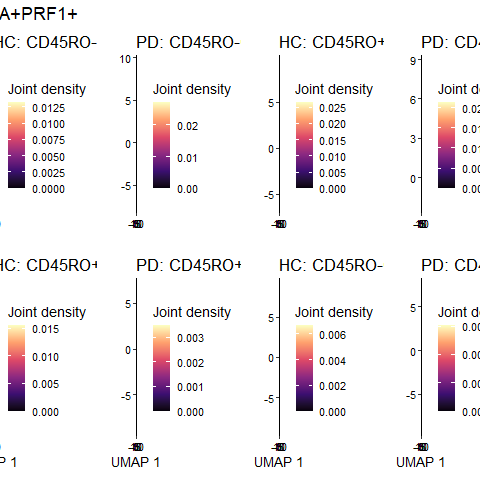

In [14]:
%%R -i resultdir
features <- c("GZMA","PRF1")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = NULL,
  assay = NULL
) 
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))



p <- ggplot(df_percent_melt%>%filter(Gene==paste0("Joint_",title_genes)),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(paste0("Joint_",title_genes))+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".png"))



write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

# GZMB+PRF1+

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


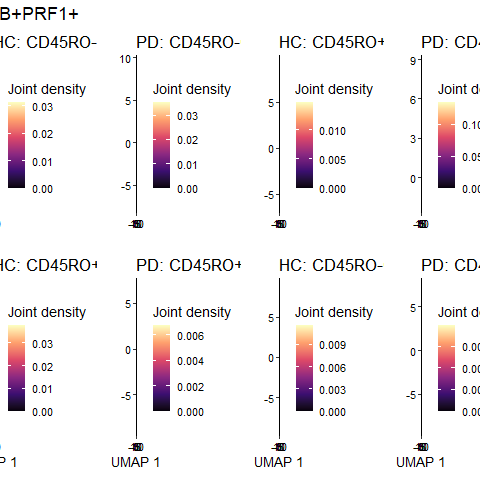

In [15]:
%%R -i resultdir
features <- c("GZMB","PRF1")
title_genes <- paste0(paste(features,collapse="+"),"+")
data_df_res <- Combined_Percent_Expressing(
  seurat_object=Subbbb,
  features= features,
  threshold = 0,
  group_by = "CellType",
  split_by = "Condition",
  entire_object = FALSE,
  slot = NULL,
  assay = NULL
) 
data_df_res$Gene <- rownames(data_df_res)
df_percent_melt  <- reshape2::melt(data_df_res, id.vars = c("Gene"))
df_percent_melt$condition <- ifelse(grepl("PD",df_percent_melt$variable),"PD","HC")
df_percent_melt$CType <- gsub('_HC|_PD','',df_percent_melt$variable)
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROm"] <- "CD45RO-CCR7-"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROp"] <- "CD45RO+CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7pCD45ROm"] <- "CD45RO-CCR7+"
df_percent_melt$CellType[df_percent_melt$CType == "CCR7mCD45ROp"] <- "CD45RO+CCR7-"
df_percent_melt$CellType <- factor(df_percent_melt$CellType ,levels=c("CD45RO-CCR7+", "CD45RO+CCR7+", "CD45RO+CCR7-", "CD45RO-CCR7-")) 
head(df_percent_melt)
p <- ggplot(df_percent_melt%>%filter(Gene==title_genes),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(title_genes)+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Exp_",title_genes,".png"))



p <- ggplot(df_percent_melt%>%filter(Gene==paste0("Joint_",title_genes)),aes(x=CellType ,
    y=value,fill=condition))+
    geom_bar(stat="identity",, position=position_dodge())+
    ylab("Percentage of cells expressing (>1)")+
    xlab("CellType")+
    theme_classic(base_size = 20)+RotatedAxis()+
    scale_fill_manual("legend", values = c("PD" = "red", "HC" = "black"))+
    NoLegend()+ggtitle(paste0("Joint_",title_genes))+xlab("")

ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".pdf"))
ggsave(plot=p,filename=paste0(resultdir,"Percentage_Joint_Exp_",title_genes,".png"))



write.csv(as.data.frame(data_df_res),paste0(resultdir,"Percentage_Exp_",title_genes,".csv"))


p11 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7+")+xlab("")+xlim(-10,10)
p12 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p21 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)
p22 <- Plot_Density_Joint_Only(seurat_object = CCR7pCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7+")+xlab("")+ylab("")+xlim(-10,10)

p31 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_HC, features = features)+ggtitle("HC: CD45RO+CCR7-")+xlim(-10,10)
p32 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROp_T_PD, features = features)+ggtitle("PD: CD45RO+CCR7-")+ylab("")+xlim(-10,10)

p41 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_HC, features = features)+ggtitle("HC: CD45RO-CCR7-")+ylab("")+xlim(-10,10)
p42 <- Plot_Density_Joint_Only(seurat_object = CCR7mCD45ROm_T_PD, features = features)+ggtitle("PD: CD45RO-CCR7-")+ylab("")+xlim(-10,10)

p_all <- p11+p12+p21+p22+p31+p32+p41+p42 +  
    plot_layout(ncol = 4)+ 
    plot_annotation(title = title_genes, theme = theme(plot.title = element_text(size = 18)))

ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".pdf"),width=15,height=8,dpi = 600)
ggsave(plot=p_all,filename=paste0(resultdir,"Subset_Density_",title_genes,".png"),width=15,height=8,dpi = 600)
p_all

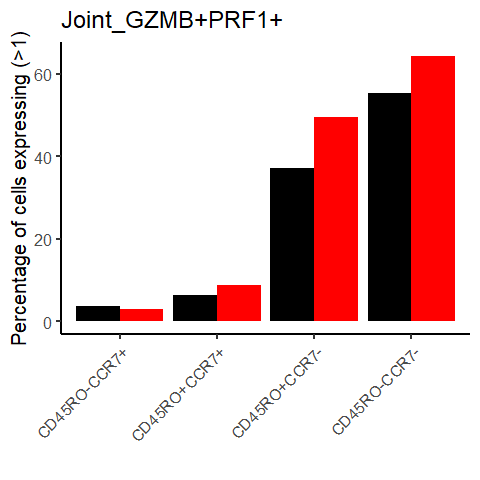

In [16]:
%%R
p